### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity

### 1. Importing your libraries and data

In [5]:
%pip install statsmodels==0.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 6.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [4]:
# seting up folder path

path = '/Users/martamajer/Desktop/Desktop - Marta’s MacBook Air - 1/10-2024 Mental Health Database/'

# importing datasets

mental_illness_prevalence_burden_daly = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'mental_illness_prevalence_burden_daly.csv'), index_col = False)

### 2. Subsetting, wrangling, and cleaning time-series data

In [5]:
df = mental_illness_prevalence_burden_daly

In [6]:
# dropping the column that is unneccesary 

df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head(5)

,Country(Entity),Year,Code,Rate: Schizophrenia,Rate: Depressive disorders,Rate: Anxiety disorders,Rate: Bipolar disorders,Rate: Eating disorders,DALYs: Schizophrenia,DALYs: Depressive disorders,DALYs: Anxiety disorders,DALYs: Bipolar disorder,DALYs: Eating disorders
0,Afghanistan,1990,AFG,0.223206,4.996118,4.713314,0.703023,0.127700,138.24825,895.22565,440.33000,147.64412,26.471115
1,Afghanistan,1991,AFG,0.222454,4.989290,4.702100,0.702069,0.123256,137.76122,893.88434,439.47202,147.56696,25.548681
2,Afghanistan,1992,AFG,0.221751,4.981346,4.683743,0.700792,0.118844,137.08030,892.34973,437.60718,147.13086,24.637949
3,Afghanistan,1993,AFG,0.220987,4.976958,4.673549,0.700087,0.115089,136.48602,891.51587,436.69104,146.78812,23.863169
4,Afghanistan,1994,AFG,0.220183,4.977782,4.670810,0.699898,0.111815,136.18323,891.39160,436.76800,146.58481,23.189074


In [8]:
df.shape

(6150, 13)

In [9]:
df.columns

Index(['Country(Entity)', 'Year', 'Code', 'Rate: Schizophrenia',
       'Rate: Depressive disorders', 'Rate: Anxiety disorders',
       'Rate: Bipolar disorders', 'Rate: Eating disorders',
       'DALYs: Schizophrenia', 'DALYs: Depressive disorders',
       'DALYs: Anxiety disorders', 'DALYs: Bipolar disorder',
       'DALYs: Eating disorders'],
      dtype='object')

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.dtypes

Country(Entity)                 object
Year                             int64
Code                            object
Rate: Schizophrenia            float64
Rate: Depressive disorders     float64
Rate: Anxiety disorders        float64
Rate: Bipolar disorders        float64
Rate: Eating disorders         float64
DALYs: Schizophrenia           float64
DALYs: Depressive disorders    float64
DALYs: Anxiety disorders       float64
DALYs: Bipolar disorder        float64
DALYs: Eating disorders        float64
dtype: object

In [12]:
# Step 1: Filter for United States and Canada
df_us_canada = df[df['Country(Entity)'].isin(['United States', 'Canada'])]

# Step 2: Create the 'Region' column and assign 'North America' to both countries
df_us_canada['Region'] = 'North America'

# Step 3: Group by 'Region' and 'Year' and calculate the mean of 'Rate: Depressive disorders'
north_america_mean_by_year = df_us_canada.groupby(['Region', 'Year'])['Rate: Depressive disorders'].mean().reset_index()

# Display the result
print(north_america_mean_by_year)

           Region  Year  Rate: Depressive disorders
0   North America  1990                    3.546336
1   North America  1991                    3.608312
2   North America  1992                    3.669294
3   North America  1993                    3.728810
4   North America  1994                    3.783150
5   North America  1995                    3.830886
6   North America  1996                    3.874300
7   North America  1997                    3.914631
8   North America  1998                    3.948696
9   North America  1999                    3.974122
10  North America  2000                    3.985185
11  North America  2001                    3.978841
12  North America  2002                    3.956398
13  North America  2003                    3.926462
14  North America  2004                    3.897943
15  North America  2005                    3.878832
16  North America  2006                    3.867672
17  North America  2007                    3.855344
18  North Am

In [13]:
north_america_mean_by_year.describe()

,Year,Rate: Depressive disorders
count,30.000000,30.000000
mean,2004.500000,3.837617
std,8.803408,0.100345
min,1990.000000,3.546336
25%,1997.250000,3.816684
50%,2004.500000,3.832059
75%,2011.750000,3.893165
max,2019.000000,3.985185


In [14]:
north_america_mean_by_year.head(50)

,Region,Year,Rate: Depressive disorders
0,North America,1990,3.546336
1,North America,1991,3.608312
2,North America,1992,3.669294
3,North America,1993,3.728810
4,North America,1994,3.783150
5,North America,1995,3.830886
6,North America,1996,3.874300
7,North America,1997,3.914631
8,North America,1998,3.948696
9,North America,1999,3.974122


In [15]:
north_america_mean_by_year.dtypes

Region                         object
Year                            int64
Rate: Depressive disorders    float64
dtype: object

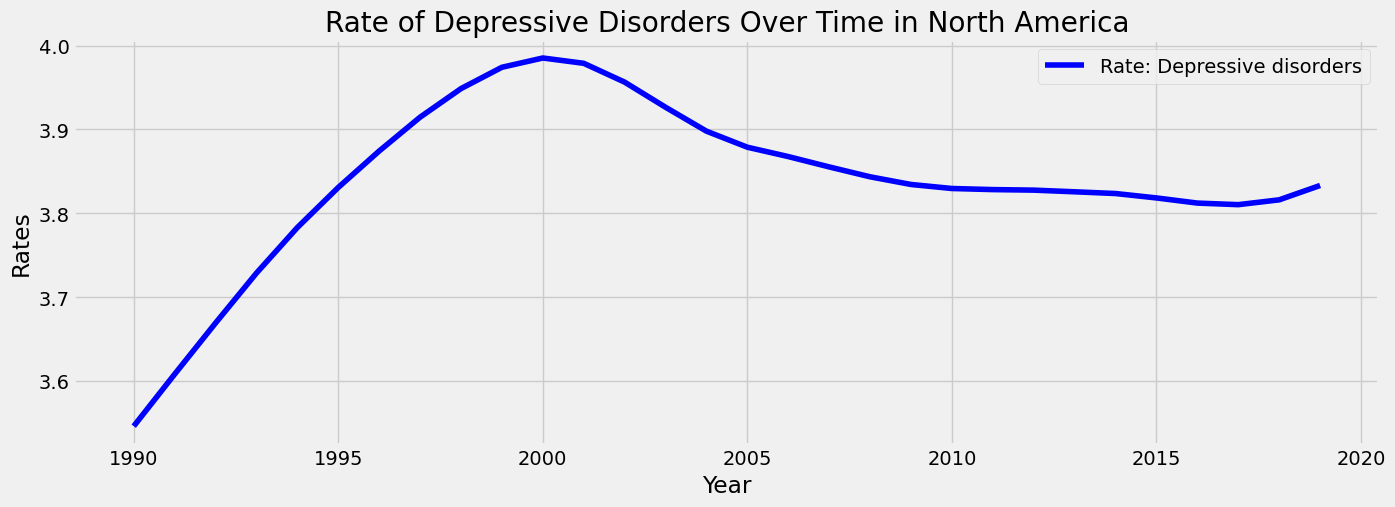

In [16]:
# Plot the data using matplotlib
plt.figure(figsize=(15, 5), dpi=100)

# Replace 'Rate: Depressive disorders' with the actual name of the column you want to plot
plt.plot(north_america_mean_by_year['Year'], north_america_mean_by_year['Rate: Depressive disorders'], label='Rate: Depressive disorders', color='blue')  # Use the 'year' column for x-axis

# Add labels and title
plt.xlabel('Year')  # X-axis label
plt.ylabel('Rates')  # Y-axis label
plt.title('Rate of Depressive Disorders Over Time in North America')  # Title of the plot
plt.legend()  # To display the legend
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

In [19]:
# Check for duplicates

dups = north_america_mean_by_year.duplicated()
dups.sum()

# No dups!

0

### 3. Time-series analysis: decomposition

In [20]:
# Step 2: Check data type of 'Year'
print(north_america_mean_by_year['Year'].dtype)  # Check the current data type

int64


In [25]:
# Step 1: Convert 'Year' to datetime format and set as index
north_america_mean_by_year['Year'] = pd.to_datetime(north_america_mean_by_year['Year'], format='%Y')
north_america_mean_by_year.set_index('Year', inplace=True)

# Step 2: Set the period for yearly data (period=1)
decomposition = sm.tsa.seasonal_decompose(north_america_mean_by_year['Rate: Depressive disorders'], model='additive', period=1)

In [26]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

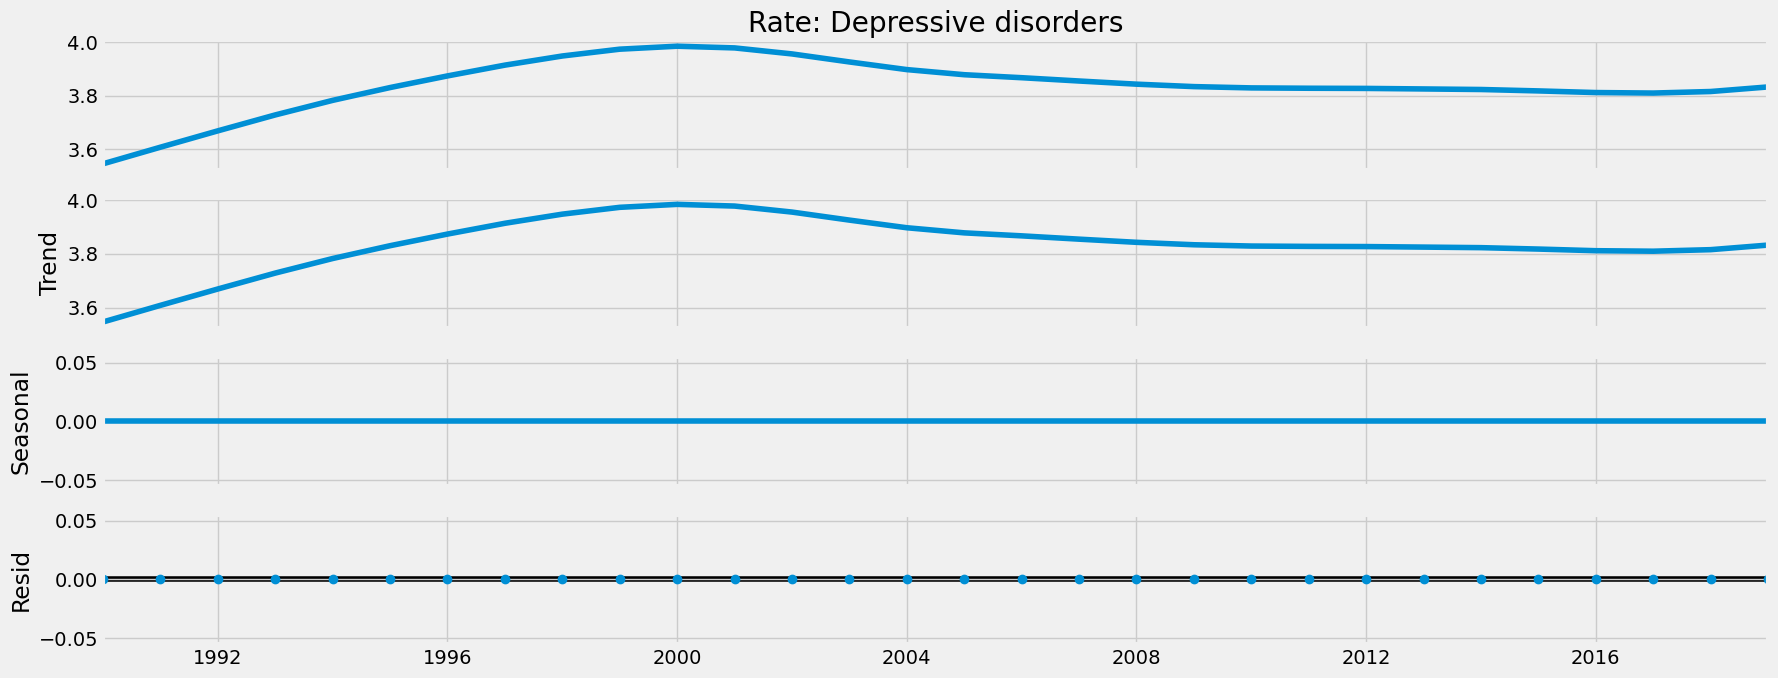

In [28]:
# Plot the separate components

decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [29]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(north_america_mean_by_year['Rate: Depressive disorders'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.104316
p-value                         0.026235
Number of Lags Used             3.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


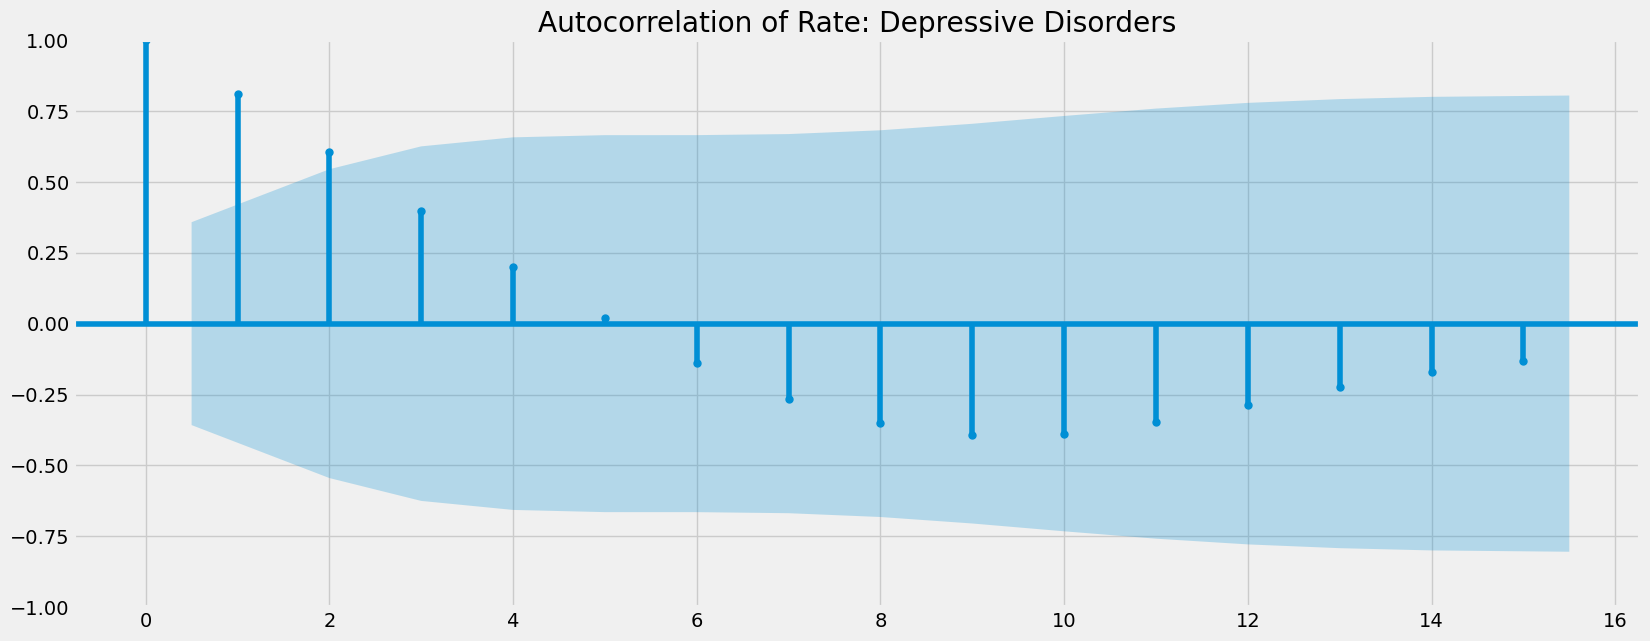

In [30]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(north_america_mean_by_year['Rate: Depressive disorders'])
plt.title('Autocorrelation of Rate: Depressive Disorders')
plt.show()

### insight: 

We could reject the null hypothesis stating that our data was non-stationary because the p-value was less than 0.05. Additionally, the Dickey-Fuller test statistic (-3.104316) is smaller than the critical value at the 5% level (-2.981247). 

Upon examining the autocorrelation function (ACF), we observe that few lags extend beyond the confidence interval. This indicates a lack of significant autocorrelation in the time series. The limited number of lags above the confidence interval suggests that the time series demonstrates weak autocorrelation, aligning with our earlier finding of stationarity.

### next steps:
I will explore the time series in Tableau to analyze how the rates are changing over time for each country. I focused on the North American region because the data for this area were nearly 100% covered by the questionnaire.